In [1]:
# -*- coding: utf-8 -*-
import requests
import parsel
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


d:\Anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.4)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [2]:

headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/126.0.0.0 Safari/537.36'
}
proxies = {
    "http": "http://127.0.0.1:7890",
    "https": "http://127.0.0.1:7890"
}
all_data = []
for start in range(0, 250, 25):
    url = f'https://movie.douban.com/top250?start={start}&filter='
    response = requests.get(url, headers=headers,proxies=proxies)
    response.encoding = 'utf-8'
    html_txt = response.text
    selector = parsel.Selector(html_txt)

    # 每一个电影条目的父容器为 ".item"
    movies = selector.css('.item')
    for movie in movies:
        title = movie.css('.hd a span:nth-of-type(1)::text').get()
        rating = movie.css('.star .rating_num::text').get()
        vote = movie.css('.star span:nth-of-type(4)::text').get()
        quote = movie.css('.quote .inq::text').get()

        # 数据清洗
        if vote:
            vote = vote.replace('人评价', '')

        # 转换数据类型
        try:
            rating = float(rating)
        except:
            rating = None

        try:
            vote = int(vote)
        except:
            vote = None

        all_data.append({
            'title': title,
            'rating': rating,
            'vote': vote,
            'quote': quote
        })


In [3]:
# 将数据转换为 DataFrame
df = pd.DataFrame(all_data)
# 将数据转换为 DataFrame
df = pd.DataFrame(all_data)

# 保存为 CSV 文件，不需要索引列，并指定编码为 UTF-8
df.to_csv("douban_top250.csv", index=False, encoding="utf-8")
# 展示前几行数据
print("数据预览：")
print(df.head())
df.to_csv("imdb_top250.csv",index=False, encoding="utf-8")
# 使用 seaborn 和 matplotlib 进行可视化
sns.set(style='whitegrid', font='SimHei', rc={"axes.unicode_minus":False})  # 如果有中文显示问题，可尝试更换字体

数据预览：
    title  rating     vote            quote
0  肖申克的救赎     9.7  3097118          希望让人自由。
1    霸王别姬     9.6  2285571            风华绝代。
2    阿甘正传     9.5  2305041        一部美国近现代史。
3   泰坦尼克号     9.5  2346202       失去的才是永恒的。 
4    千与千寻     9.4  2394266  最好的宫崎骏，最好的久石让。 


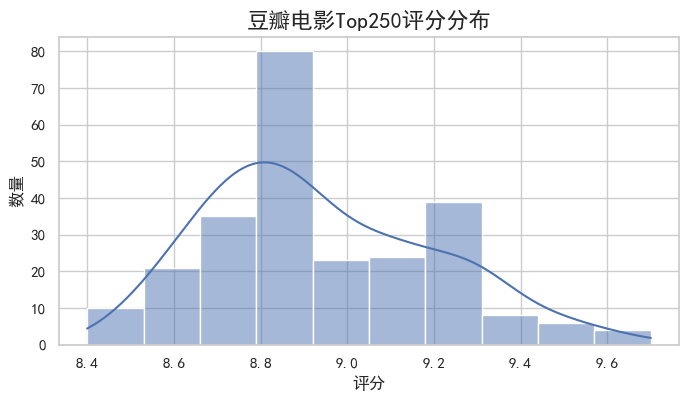

In [4]:



# 评分分布直方图
plt.figure(figsize=(8,4))
sns.histplot(df['rating'], kde=True, bins=10)
plt.title("豆瓣电影Top250评分分布", fontsize=16)
plt.xlabel("评分")
plt.ylabel("数量")
plt.show()


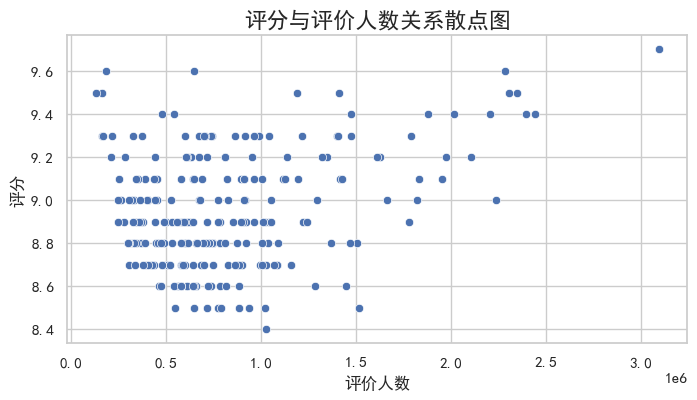

In [5]:


# 评分与评价人数的关系散点图
plt.figure(figsize=(8,4))
sns.scatterplot(data=df, x="vote", y="rating")
plt.title("评分与评价人数关系散点图", fontsize=16)
plt.xlabel("评价人数")
plt.ylabel("评分")
plt.show()


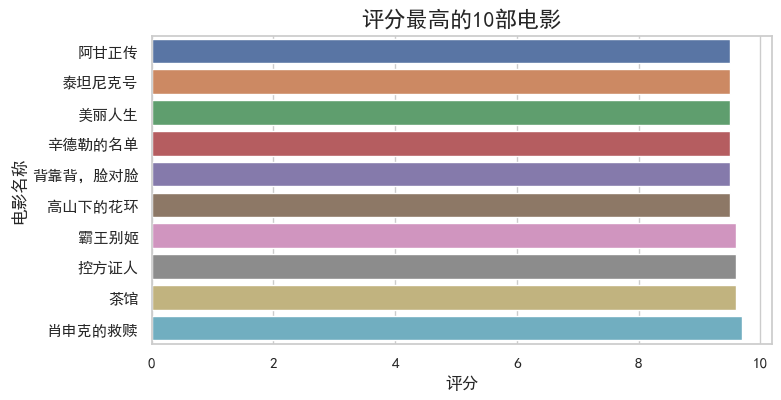

In [6]:

# 如果你想查看最高评分的前10部电影条形图，例如：
top10 = df.nlargest(10, 'rating').sort_values('rating', ascending=True)
plt.figure(figsize=(8,4))
sns.barplot(x='rating', y='title', data=top10, orient='h')
plt.title("评分最高的10部电影", fontsize=16)
plt.xlabel("评分")
plt.ylabel("电影名称")
plt.show()